In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customertrialdata.xlsx to customertrialdata.xlsx


In [ ]:
df = pd.read_excel('customertrialdata.xlsx')
df.drop(['PRIMARY.ASSET.MODELNO'], axis='columns', inplace=True)

In [ ]:
df.head()

,APPLICATION.ID,QUEUE.ID,CURRENT.STAGE,MARITAL.STATUS,GENDER,AGE,EDUCATION,RESIDENCE.TYPE,CITY,STATE,EMPLOY.CONSTITUTION,PAN.STATUS,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR,OWN.HOUSE.TYPE,PRIMARY.ASSET.CTG,PRIMARY.ASSET.MAKE,VOTER_ID,DRIVING_LICENSE,AADHAAR,PAN,BANK_PASSBOOK,APPLICATION.STATUS
0,27497000024,Straight Through Process,PD_DE,Single,Male,30,GRADUATE,OWNED-BUNGLOW,UDHANA,GUJARAT,SELF-EMPLOYED,Pan Not Submitted,69.0,32321,28000,10,Self Owned,REF-FF HOME,SAMSUNG,F,F,T,F,F,Declined
1,25556001005,Straight Through Process,PD_DE,Married,Male,38,OTHERS,PARENT OWNED-HOUSE,BHOPAL,MADHYA PRADESH,SELF-EMPLOYED,Pan Not Submitted,108.0,47000,47000,12,Parent Owned,TELEVISION,SONY,F,T,F,F,F,Approved
2,27220000249,Straight Through Process,PD_DE,Married,Male,52,GRADUATE,OWNED-ROWHOUSE,RAIPUR,CHHATTISGARH,SELF-EMPLOYED,Pan Not Submitted,143.0,30000,30000,12,Self Owned,AIR CONDITIONER,ELECTROLUX,F,T,F,F,F,Approved
3,27067000029,Under.Writer,DCLN,Married,Male,57,GRADUATE,OWNED-BUNGLOW,JAMNAGAR,GUJARAT,SELF-EMPLOYED,Pan Not Submitted,60.0,32321,49000,12,Self Owned,HOME THEATRE,TARGET,F,F,T,F,F,Declined
4,26189000138,Straight Through Process,APRV,Married,Male,38,GRADUATE,OWNED-BUNGLOW,UDHANA,GUJARAT,SALARIED,ERROR,62.0,32321,45000,10,Self Owned,SPLIT AC,ELECTROLUX,F,F,F,T,F,Approved


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APPLICATION.ID       7759 non-null   int64  
 1   QUEUE.ID             7759 non-null   object 
 2   CURRENT.STAGE        7759 non-null   object 
 3   MARITAL.STATUS       7759 non-null   object 
 4   GENDER               7759 non-null   object 
 5   AGE                  7759 non-null   int64  
 6   EDUCATION            7759 non-null   object 
 7   RESIDENCE.TYPE       7759 non-null   object 
 8   CITY                 7759 non-null   object 
 9   STATE                7759 non-null   object 
 10  EMPLOY.CONSTITUTION  7759 non-null   object 
 11  PAN.STATUS           7759 non-null   object 
 12  APPLICATION.SCORE    7759 non-null   float64
 13  APPROVED.AMOUNT      7759 non-null   int64  
 14  APPLIED.AMOUNT       7759 non-null   int64  
 15  LOAN.TENOR           7759 non-null   i

In [ ]:
df.isna().sum()

APPLICATION.ID         0
QUEUE.ID               0
CURRENT.STAGE          0
MARITAL.STATUS         0
GENDER                 0
AGE                    0
EDUCATION              0
RESIDENCE.TYPE         0
CITY                   0
STATE                  0
EMPLOY.CONSTITUTION    0
PAN.STATUS             0
APPLICATION.SCORE      0
APPROVED.AMOUNT        0
APPLIED.AMOUNT         0
LOAN.TENOR             0
OWN.HOUSE.TYPE         0
PRIMARY.ASSET.CTG      0
PRIMARY.ASSET.MAKE     0
VOTER_ID               0
DRIVING_LICENSE        0
AADHAAR                0
PAN                    0
BANK_PASSBOOK          0
APPLICATION.STATUS     0
dtype: int64

In [ ]:
df.columns

Index(['APPLICATION.ID', 'QUEUE.ID', 'CURRENT.STAGE', 'MARITAL.STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE.TYPE', 'CITY', 'STATE',
       'EMPLOY.CONSTITUTION', 'PAN.STATUS', 'APPLICATION.SCORE',
       'APPROVED.AMOUNT', 'APPLIED.AMOUNT', 'LOAN.TENOR', 'OWN.HOUSE.TYPE',
       'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE', 'VOTER_ID',
       'DRIVING_LICENSE', 'AADHAAR', 'PAN', 'BANK_PASSBOOK',
       'APPLICATION.STATUS'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns:
    print(col)
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

APPLICATION.ID
QUEUE.ID
CURRENT.STAGE
MARITAL.STATUS
GENDER
AGE
EDUCATION
RESIDENCE.TYPE
CITY
STATE
EMPLOY.CONSTITUTION
PAN.STATUS
APPLICATION.SCORE
APPROVED.AMOUNT
APPLIED.AMOUNT
LOAN.TENOR
OWN.HOUSE.TYPE
PRIMARY.ASSET.CTG
PRIMARY.ASSET.MAKE
VOTER_ID
DRIVING_LICENSE
AADHAAR
PAN
BANK_PASSBOOK
APPLICATION.STATUS
19 columns were label encoded.


In [ ]:
X = df.drop("APPLICATION.STATUS", axis=1)
y = df["APPLICATION.STATUS"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,train_size=0.60)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("ACCURACY OF THE Decision tree: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE Decision tree:  0.9990335051546392


[Text(133.92000000000002, 201.90857142857143, 'X[13] <= 32160.5\ngini = 0.49\nsamples = 4655\nvalue = [2659, 1996]'),
 Text(100.44000000000001, 170.84571428571428, 'gini = 0.0\nsamples = 1176\nvalue = [1176, 0]'),
 Text(167.40000000000003, 170.84571428571428, 'X[13] <= 32410.5\ngini = 0.489\nsamples = 3479\nvalue = [1483, 1996]'),
 Text(66.96000000000001, 139.78285714285715, 'X[2] <= 0.5\ngini = 0.375\nsamples = 2660\nvalue = [665, 1995]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 662\nvalue = [662, 0]'),
 Text(100.44000000000001, 108.72, 'X[2] <= 1.5\ngini = 0.003\nsamples = 1998\nvalue = [3, 1995]'),
 Text(66.96000000000001, 77.65714285714284, 'gini = 0.0\nsamples = 1274\nvalue = [0, 1274]'),
 Text(133.92000000000002, 77.65714285714284, 'X[2] <= 4.5\ngini = 0.008\nsamples = 724\nvalue = [3, 721]'),
 Text(100.44000000000001, 46.59428571428572, 'X[9] <= 5.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(66.96000000000001, 15.531428571428563, 'gini = 0.0\nsamples = 

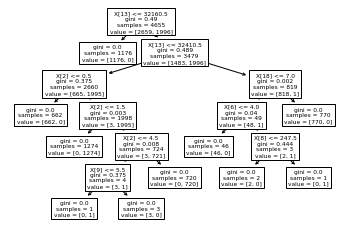

In [ ]:
from sklearn import tree
tree.plot_tree(classifier) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1776    2]
 [   1 1325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1778
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      3104
   macro avg       1.00      1.00      1.00      3104
weighted avg       1.00      1.00      1.00      3104



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators = 100)  
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_test)
print("ACCURACY OF THE Random forest: ", metrics.accuracy_score(y_test, y_pred1))

ACCURACY OF THE Random forest:  0.9990335051546392


In [ ]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[1776    2]
 [   1 1325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1778
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      3104
   macro avg       1.00      1.00      1.00      3104
weighted avg       1.00      1.00      1.00      3104

